<a href="https://colab.research.google.com/github/agsam/Iris-Classification/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris (1).csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [0]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


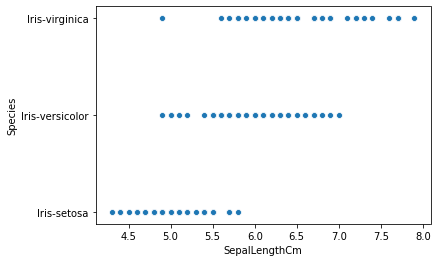

In [0]:
sns.scatterplot(x=data['SepalLengthCm'], y=data['Species'])

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


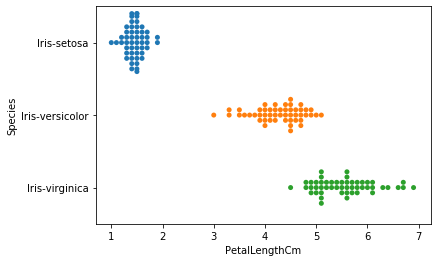

In [0]:
sns.swarmplot(x=data['PetalLengthCm'], y=data['Species'])

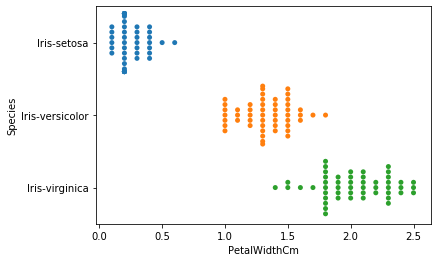

In [0]:
sns.swarmplot(x=data['PetalWidthCm'], y=data['Species'])

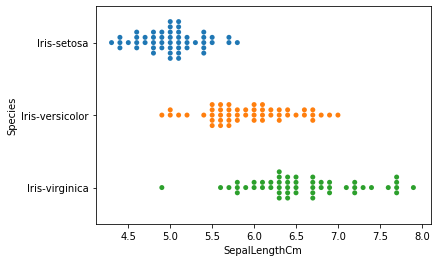

In [0]:
sns.swarmplot(x=data['SepalLengthCm'], y=data['Species'])

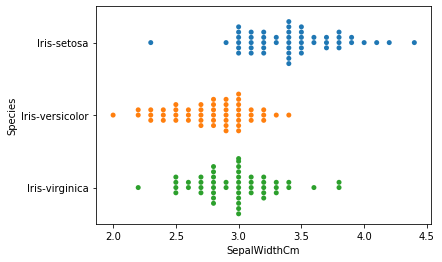

In [0]:
sns.swarmplot(x=data['SepalWidthCm'], y=data['Species'])

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [0]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [0]:
train_x=train.drop(columns=['Species'], axis=1)
train_y=train['Species']

test_x=test.drop(columns=['Species'], axis=1)
test_y=test['Species']

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
K_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [0]:
model = KNeighborsClassifier(n_neighbors=5)
scoring='accuracy'
score=cross_val_score(model, train_x, train_y, cv=K_fold, n_jobs=1,
                      scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.91666667 0.91666667 0.91666667 0.91666667 1.         1.
 0.91666667 0.91666667 1.         0.91666667]


94.17

In [0]:
model = DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(model, train_x, train_y, cv=K_fold, n_jobs=1,
                      scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.91666667 0.91666667 0.83333333 0.91666667 1.         1.
 0.91666667 0.75       1.         0.91666667]


91.67

In [0]:
model = RandomForestClassifier()
scoring='accuracy'
score=cross_val_score(model, train_x, train_y, cv=K_fold, n_jobs=1,
                      scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.83333333 0.91666667 0.83333333 0.91666667 1.         1.
 1.         0.91666667 1.         0.91666667]


93.33

In [0]:
model = GaussianNB()
scoring='accuracy'
score=cross_val_score(model, train_x, train_y, cv=K_fold, n_jobs=1,
                      scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.91666667 0.91666667 0.91666667 0.91666667 1.         1.
 1.         0.91666667 1.         0.83333333]


94.17

In [0]:
model = SVC()
scoring='accuracy'
score=cross_val_score(model, train_x, train_y, cv=K_fold, n_jobs=1,
                      scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.91666667 0.91666667 0.91666667 1.         1.         1.
 0.91666667 1.         1.         0.83333333]


95.0

In [0]:
model = SVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print(prediction)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
print(accuracy_score(test_y,prediction))

1.0
